# American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the hands combined with facial expressions and postures of the body. It is the primary language of many North Americans who are deaf and is one of several communication options used by people who are deaf or hard-of-hearing.

The hand gestures representing English alphabets are shown below. This excercise focuses on classifying a subset of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand showing one of the letters A-I, we want to detect which letter is being represented.

![](https://drive.google.com/uc?export=view&id=1C8r-cwHSbpK2bD4n-00XzKhwuPN1ZOQv)

## Data Loading
The data for this excercise is present in "[asl_data.zip](https://www.dropbox.com/s/r75maq5e1vyda4g/asl_data.zip?dl=0)". The dataset contains 9 classes (images corresponding to characters A to I). For convenience, the dataset is structured in such a way that we can use TorchVision's ImageFolder dataset [(documentation)](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder) rather than writing your own custom dataset loader.

In [1]:
# Define the standard imports
from __future__ import print_function
import copy
import os
import time
from __future__ import division

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download the data in the current working directory
!rm -rf asl_data.zip asl_data
!wget -O asl_data.zip https://www.dropbox.com/s/r75maq5e1vyda4g/asl_data.zip?dl=0
!unzip asl_data.zip
!rm asl_data.zip

# Top level data directory. Here we assume the format of the directory conforms 
#   to the ImageFolder structure
data_dir = "./asl_data"

# Define the class label
class_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I'}

--2020-11-17 08:05:27--  https://www.dropbox.com/s/r75maq5e1vyda4g/asl_data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/r75maq5e1vyda4g/asl_data.zip [following]
--2020-11-17 08:05:27--  https://www.dropbox.com/s/raw/r75maq5e1vyda4g/asl_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc92a7b856509ccf21812e30ba1.dl.dropboxusercontent.com/cd/0/inline/BDXDQqVClkgfDjmhYbdy2MLQEk5quf877zggP_lbXKml4tG_Ms4g5rRB8g28rOrkLI6avy7zfD9OEPShYRl3mxLGFhQ1-TrAFppbSsu4uPRgSHfNdlVVTLXnPWln2PRfp00/file# [following]
--2020-11-17 08:05:27--  https://ucc92a7b856509ccf21812e30ba1.dl.dropboxusercontent.com/cd/0/inline/BDXDQqVClkgfDjmhYbdy2MLQEk5quf877zggP_lbXKml4tG_Ms4g5rRB8g28rOrkLI6avy7zfD9OEPShYRl3mxLGFhQ1-TrAFppbSsu4uPRgS

## Visualize the data

We will now see how the sample data looks like

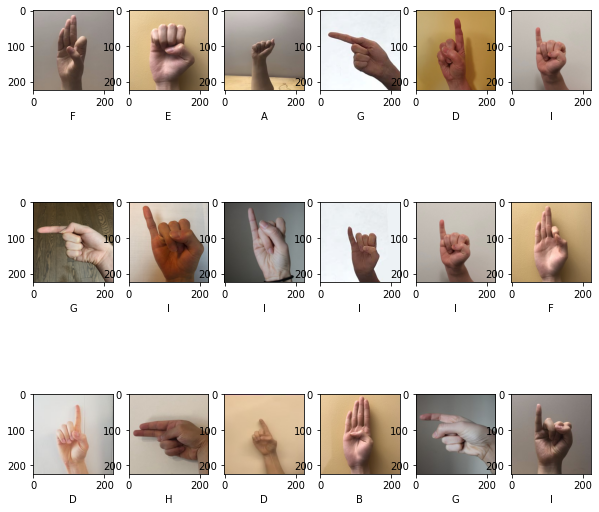

In [3]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform=transforms.ToTensor()) for x in ['train', 'val']}
val_dataloader = torch.utils.data.DataLoader(image_datasets['val'], batch_size=1, shuffle=True)
train_dataloader = torch.utils.data.DataLoader(image_datasets['train'], batch_size=1, shuffle=True)
f = plt.figure(figsize=(10, 10))
for i in range(18):
    img, label = next(iter(val_dataloader))
    img = img.squeeze().permute(1, 2, 0).numpy()
    plt.subplot(3, 6, i+1)
    plt.imshow(img)
    plt.xlabel(class_dict[label.numpy()[0]])

# Excercise: Neural Network

In this excercise you will be using a neural network. You are free to use one of the pretrained model, as demonstrated in the previous lab, or write your own neural network from scratch.

You may use the PyTorch documentation, previous excercises and notebooks freely. You might find documentations and notebooks discussed in the last two classes helpful. However, all code and analysis that you submit must be your own.


### **Questions**
**Question 1: Model Building**

Build a multi-layered perceptron (MLP) in Pytorch that inputs  that takes the (224x224 RGB) image as input, and predicts the letter (You may need to flatten the image vector first). Your model should be a subclass of `nn.Module`. Explain your choice of neural network architecture: how many layers your network has? What types of layers does it contain? What about other decisions like use of dropout layers, activation functions, number of channels / hidden units.

**Question 2: Training Code** 

Write code to train your neural network given some training data. Your training code should make it easy to tweak hyperparameters. Make sure that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice of loss function. Ensure that your code runs on GPU.


**Question 3: Overfit to a Small Dataset** 

**Part (a)**: One way to sanity check our neural network model and training code is to check whether the model is capable of overfitting a small dataset. Construct a small dataset (e.g. 1-2 image per class). Then show that your model and training code is capable of overfitting on that small dataset. You should be able to obtain a 100% training accuracy on that small dataset relatively quickly.

If your model cannot overfit the small dataset quickly, then there is a bug in either your model code and/or your training code. Fix the issues before you proceed to the next step.

**Part (b)**: Once you are done with the above part, try to reduce the effect of overfitting by using techniques discussed in the previous lecture.

**Question 4: Finetuning** 

For many image classification tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to the enormous compute requirements and lack of sufficient amounts of training data.

In this part, you will use Transfer Learning to extract features from the hand gesture images. Then, train last few classification layers to use these features as input and classify the hand gestures. As you have learned in the previous lecture, you can use AlexNet architecture that is pretrained on 1000-class ImageNet dataset and finetune it for the task of understanding American sign language.

**Question 5: Report result** 

Train your new network, including any hyperparameter tuning. Plot and submit the training and validation loss and accuracy of your best model only. Along with it, also submit the final validation accuracy achieved by your model.


# Question 1: Model Building

Build a multi-layered perceptron (MLP) in Pytorch that inputs that takes the (224x224 RGB) image as input, and predicts the letter (You may need to flatten the image vector first). Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how many layers your network has? What types of layers does it contain? What about other decisions like use of dropout layers, activation functions, number of channels / hidden units.

Here, the neural network architecture used is as follows: 
- Number of layers: 5 
- Type of layers: Linear 
- Dropout Layers: None 
- Activation function: ReLU

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.layer1 = nn.Linear(3 * 224 * 224, 128 * 3)
        self.layer2 = nn.Linear(128 * 3, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 9)

    def forward(self, img):
        flattened = img.view(-1, 3 * 224 * 224)
        #print(flattened.shape)
        activation1 = F.relu(self.layer1(flattened))
        activation2 = F.relu(self.layer2(activation1))
        activation3 = F.relu(self.layer3(activation2))
        activation4 = F.relu(self.layer4(activation3))
        output = self.layer5(activation4)
        return output

model = Net()

In [5]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 10)

weights_init(model)
len(list(model.parameters()))

10

# Question 2: Training Code

Write code to train your neural network given some training data. Your training code should make it easy to tweak hyperparameters. Make sure that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice of loss function. Ensure that your code runs on GPU.

The loss function used here is cross-entropy loss. However the train function also has an option to enter preferred criterion and optimizer (if needed), and also tweak other parameters. 

The model checkpoints itself every 10 iterations. 

Loss function used here is cross-entropy loss. Cross Entropy is a good loss function for classification problems, as it minimizes the distance between the probability distributions of the predicted and actual set.

In [6]:
def trainval(model, train_data, valid_data, device, criterion=None, optimizer=None, batch_size=20, num_iters=1, learn_rate=0.01, weight_decay=0):
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)  # shuffle after every epoch
  val_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
  if(criterion == None):
    criterion = nn.CrossEntropyLoss()
  if(optimizer == None):
    optimizer = optim.SGD(model.parameters(), lr=learn_rate, momentum=0.5, weight_decay=weight_decay)

  iters, losses, val_losses, train_acc, val_acc = [], [], [], [], []
  best_val_acc = 0
  best_model_weights = copy.deepcopy(model.state_dict())

  # training
  for n in range(num_iters):
    for imgs, labels in train_loader:
      imgs, labels = imgs.to(device), labels.to(device)

      model.train()  # *****************************#
      optimizer.zero_grad()   # a clean up step for PyTorch
      out = model(imgs)   # forward pass
      loss = criterion(out, labels)  # compute the total loss
      loss.backward()   # backward pass (compute parameter updates)
      optimizer.step()  # make the updates for each parameter

      # save the current training information
      if n % 10 == 9:
        #print('y', end='')

        print('\nEpoch {}/{} : '.format(n, num_iters),end ="")

        iters.append(n)
        # compute *average* loss
        losses.append(float(loss)/batch_size)
        train_accuracy = get_accuracy(model, train_data, device)
        val_accuracy = get_accuracy(model, valid_data, device)

        for im, lb in val_loader:
          im, lb = im.to(device), lb.to(device)
          val_out = model(im)
          val_loss = criterion(val_out, lb)
        val_losses.append(float(val_loss)/batch_size)
        train_acc.append(train_accuracy)  # compute training accuracy
        val_acc.append(val_accuracy)   # compute validation accuracy
        if val_accuracy > best_val_acc:
          best_val_acc = val_accuracy
          best_model_weights = copy.deepcopy(model.state_dict())
        print('Train: Loss: {:.4f} Acc: {:.4f}'.format(float(loss)/batch_size , train_accuracy), end="\t")
        print('Valid: Loss: {:.4f} Acc: {:.4f}'.format(float(val_loss)/batch_size, val_accuracy), end="\t")
        

        

  print()
  plot_accuracy_model(iters, losses, val_losses, train_acc, val_acc)
  print("Final Training Accuracy: {}".format(train_acc[-1]))
  print("Final Validation Accuracy: {}".format(val_acc[-1]))
  print("Best Validation Accuracy: {} at epoch {} [Training accuracy: {}]".format(best_val_acc, val_acc.index(max(val_acc)), train_acc[val_acc.index(max(val_acc))]))
  model.load_state_dict(best_model_weights)

In [7]:
def plot_accuracy_model(iters, losses, val_losses, train_acc, val_acc):
  # plotting
  plt.figure(figsize=(10, 4))
  plt.subplot(1, 2, 1)
  plt.title("Training Curve: Loss")
  plt.plot(iters, losses, label="Train")
  plt.plot(iters, val_losses, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")

  plt.subplot(1, 2, 2)
  plt.title("Training Curve: Accuracy")
  plt.plot(iters, train_acc, label="Train")
  plt.plot(iters, val_acc, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Training Accuracy")
  plt.legend(loc='best')
  plt.ylim((0, 1.1))
  plt.show()

In [8]:
def get_accuracy(model, data, device):
  correct = 0
  total = 0

  model.eval()  # *********#
  for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
    imgs, labels = imgs.to(device), labels.to(device)
    output = model(imgs)
    pred = output.max(1, keepdim=True)[1]  # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
    accuracy = correct / total
  return accuracy

# Question 3: Overfit to a Small Dataset




## Part a: 

One way to sanity check our neural network model and training code is to check whether the model is capable of overfitting a small dataset. Construct a small dataset (e.g. 1-2 image per class). Then show that your model and training code is capable of overfitting on that small dataset. You should be able to obtain a 100% training accuracy on that small dataset relatively quickly.

If your model cannot overfit the small dataset quickly, then there is a bug in either your model code and/or your training code. Fix the issues before you proceed to the next step.

### Contructing the small dataset

Since the dataset consists of images of each label arranged one after the other, it is necessary to ensure that the training set contains an equal distribution of images of all the 9 labels. For this, we first find where each label starts and ends in a distribution, and then choose 2 image each per label (starting from the start position) for the training set, and 10 image each per label for the validation set.

In [9]:
def get_small_dataset(parent, number_per_each, num_labels=9):
    end_loc = [0]*num_labels
    cur = 0
    for i in range(len(parent)):
        label = parent[i][1]
        if(label != cur):
            print(label, ":", i, end="\n")
            end_loc[label] = i
            cur = label
    small_dataset = []
    for i in range(num_labels):
        small_dataset += parent[end_loc[i]:end_loc[i]+number_per_each]
    np.random.shuffle(small_dataset)
    count = [0]*9
    for i in range(len(small_dataset)):
        label = small_dataset[i][1]
        count[label] += 1
    print('Counts:', count)
    return small_dataset

In [10]:
train_dataset_full = list(image_datasets['train'])
test_dataset_full = list(image_datasets['val'])

train_dataset_small = get_small_dataset(train_dataset_full,2)
val_dataset_small = get_small_dataset(train_dataset_full,20)

print('Number of training images: {}'.format(len(train_dataset_small)))
print('Number of validation images: {}'.format(len(val_dataset_small)))

1 : 108
2 : 215
3 : 307
4 : 414
5 : 506
6 : 612
7 : 714
8 : 818
Counts: [2, 2, 2, 2, 2, 2, 2, 2, 2]
1 : 108
2 : 215
3 : 307
4 : 414
5 : 506
6 : 612
7 : 714
8 : 818
Counts: [20, 20, 20, 20, 20, 20, 20, 20, 20]
Number of training images: 18
Number of validation images: 180


### Training
For training, we use these small set of training and a large set of validation images, and set the number of iterations to 2000.

In [11]:
model = Net()

In [12]:
# Ship data and model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)


Epoch 9/2000 : Train: Loss: 0.1093 Acc: 0.1111	Valid: Loss: 0.1099 Acc: 0.1111	
Epoch 19/2000 : Train: Loss: 0.1083 Acc: 0.1111	Valid: Loss: 0.1099 Acc: 0.1111	
Epoch 29/2000 : Train: Loss: 0.1060 Acc: 0.1111	Valid: Loss: 0.1112 Acc: 0.1111	
Epoch 39/2000 : Train: Loss: 0.1023 Acc: 0.1111	Valid: Loss: 0.1101 Acc: 0.0944	
Epoch 49/2000 : Train: Loss: 0.0969 Acc: 0.3889	Valid: Loss: 0.1069 Acc: 0.1611	
Epoch 59/2000 : Train: Loss: 0.0914 Acc: 0.3889	Valid: Loss: 0.1081 Acc: 0.2389	
Epoch 69/2000 : Train: Loss: 0.0801 Acc: 0.2778	Valid: Loss: 0.1059 Acc: 0.1833	
Epoch 79/2000 : Train: Loss: 0.0632 Acc: 0.7222	Valid: Loss: 0.1002 Acc: 0.3111	
Epoch 89/2000 : Train: Loss: 0.0807 Acc: 0.1111	Valid: Loss: 0.1228 Acc: 0.1111	
Epoch 99/2000 : Train: Loss: 0.0574 Acc: 0.3889	Valid: Loss: 0.1095 Acc: 0.2111	
Epoch 109/2000 : Train: Loss: 0.0975 Acc: 0.1111	Valid: Loss: 0.1613 Acc: 0.1111	
Epoch 119/2000 : Train: Loss: 0.0594 Acc: 0.7778	Valid: Loss: 0.0949 Acc: 0.3056	
Epoch 129/2000 : Train: Lo

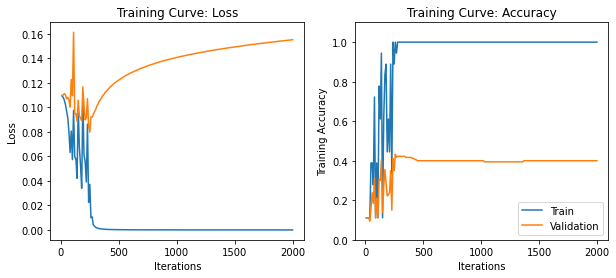

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.4
Best Validation Accuracy: 0.43333333333333335 at epoch 25 [Training accuracy: 1.0]


In [13]:
# Train and evaluate
trainval(model, train_dataset_small, val_dataset_small, device, num_iters=2000)

This shows that the model has overfit pretty quickly

---



## Part b
Once you are done with the above part, try to reduce the effect of overfitting by using techniques discussed in the previous lecture.

The different ways by which one can reduce overfitting is as follows: 
1.	Early stopping 
2.	Augmenting the train dataset 
3.	Dropout 
4.	Weight decay 

Below, we attempt to use all of these measures to some degree, to get a better validation accuracy: (for 1000 iterations)

In [14]:
# For this, we use 3 images per label from the training dataset, as our training set.
train_dataset_augmented = get_small_dataset(train_dataset_full, 3)

1 : 108
2 : 215
3 : 307
4 : 414
5 : 506
6 : 612
7 : 714
8 : 818
Counts: [3, 3, 3, 3, 3, 3, 3, 3, 3]



Epoch 9/1000 : Train: Loss: 0.1101 Acc: 0.1111	Valid: Loss: 0.1103 Acc: 0.1111	
Epoch 9/1000 : Train: Loss: 0.1096 Acc: 0.1111	Valid: Loss: 0.1103 Acc: 0.1111	
Epoch 19/1000 : Train: Loss: 0.1092 Acc: 0.1111	Valid: Loss: 0.1101 Acc: 0.1111	
Epoch 19/1000 : Train: Loss: 0.1105 Acc: 0.1111	Valid: Loss: 0.1101 Acc: 0.1111	
Epoch 29/1000 : Train: Loss: 0.1100 Acc: 0.1111	Valid: Loss: 0.1100 Acc: 0.1111	
Epoch 29/1000 : Train: Loss: 0.1079 Acc: 0.1111	Valid: Loss: 0.1100 Acc: 0.1111	
Epoch 39/1000 : Train: Loss: 0.1096 Acc: 0.1111	Valid: Loss: 0.1101 Acc: 0.1111	
Epoch 39/1000 : Train: Loss: 0.1082 Acc: 0.1111	Valid: Loss: 0.1101 Acc: 0.1111	
Epoch 49/1000 : Train: Loss: 0.1096 Acc: 0.1111	Valid: Loss: 0.1099 Acc: 0.1111	
Epoch 49/1000 : Train: Loss: 0.1097 Acc: 0.1111	Valid: Loss: 0.1099 Acc: 0.1111	
Epoch 59/1000 : Train: Loss: 0.1087 Acc: 0.1852	Valid: Loss: 0.1098 Acc: 0.1222	
Epoch 59/1000 : Train: Loss: 0.1094 Acc: 0.1852	Valid: Loss: 0.1099 Acc: 0.1222	
Epoch 69/1000 : Train: Loss: 

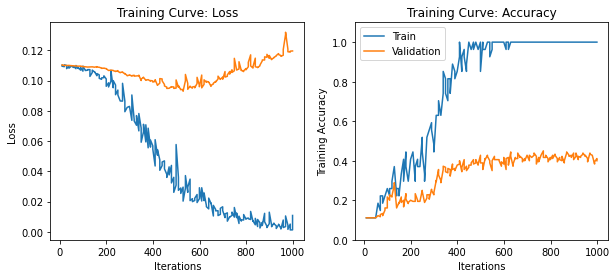

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.4
Best Validation Accuracy: 0.45 at epoch 152 [Training accuracy: 1.0]


In [15]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()

        self.layer1 = nn.Linear(3 * 224 * 224, 128 * 2)
        self.layer2 = nn.Linear(128 * 2, 128 )
        self.layer3 = nn.Linear(128 , 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 9)

        self.dropout1 = nn.Dropout(0.1) # drop out layer with 20% dropped out neuron
        self.dropout2 = nn.Dropout(0.1)
        self.dropout3 = nn.Dropout(0.1)
        self.dropout4 = nn.Dropout(0.1)

    def forward(self, img):
        flattened = img.view(-1, 3 * 224 * 224)
        #print(flattened.shape)
        activation1 = F.relu(self.layer1(self.dropout1(flattened)))
        activation2 = F.relu(self.layer2(self.dropout2(activation1)))
        activation3 = F.relu(self.layer3(self.dropout3(activation2)))
        activation4 = F.relu(self.layer4(self.dropout3(activation3)))

        output = self.layer5(activation4)
        return output

model = NetWithDropout()

model.to(device)

# By using a hyperparameter weight_decay, we can set the weight_decay to 0.001 as below
trainval(model, train_dataset_augmented, val_dataset_small, device, num_iters=1000,  weight_decay=0.001, learn_rate=0.001)


# Question 4: Finetuning

For many image classification tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to the enormous compute requirements and lack of sufficient amounts of training data.

In this part, you will use Transfer Learning to extract features from the hand gesture images. Then, train last few classification layers to use these features as input and classify the hand gestures. As you have learned in the previous lecture, you can use AlexNet architecture that is pretrained on 1000-class ImageNet dataset and finetune it for the task of understanding American sign language.



In [16]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0
    model_ft = models.alexnet(pretrained=use_pretrained)
    if feature_extract:
      for param in model_ft.parameters():
          param.requires_grad = False
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
    input_size = 224
    
    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model(model_name = "alexnet", num_classes = 9, feature_extract = True, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth



AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)


In [17]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):

    val_acc_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    iters, losses, val_losses, train_acc, val_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        iters.append(epoch)
        #print('y', end="")
        print('Epoch {}/{} : '.format(epoch, num_epochs - 1),end ="")

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), end="\t")
            if phase == 'train':
              losses.append(epoch_loss)
              train_acc.append(epoch_acc)
            if phase == 'val':
              val_losses.append(epoch_loss)
              val_acc.append(epoch_acc)
           

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    print("\n\nFinal Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    epoch = val_acc.index(max(val_acc))
    print("Best Validation Accuracy: {} at epoch {} [Training accuracy: {}]".format(best_acc,epoch, train_acc[epoch]))
    #print("Best Validation Loss: {} at epoch {} [Training Loss: {}]".format(val_losses[epoch], losses[epoch]))
    
    # load best model weights
    model.load_state_dict(best_model_wts)

    # plot the charts
    plot_accuracy_model(iters, losses, val_losses, train_acc, val_acc)

    return model, val_acc_history

In [18]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are 
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")

params_to_update = []
for name,param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 classifier.6.weight
	 classifier.6.bias


Epoch 0/19 : train Loss: 1.4946 Acc: 0.4404	val Loss: 0.9233 Acc: 0.6164	
Epoch 1/19 : train Loss: 0.8979 Acc: 0.6692	val Loss: 0.8849 Acc: 0.6767	
Epoch 2/19 : train Loss: 0.8063 Acc: 0.7111	val Loss: 0.7512 Acc: 0.7198	
Epoch 3/19 : train Loss: 0.6978 Acc: 0.7444	val Loss: 0.5705 Acc: 0.7888	
Epoch 4/19 : train Loss: 0.6808 Acc: 0.7347	val Loss: 0.6059 Acc: 0.7672	
Epoch 5/19 : train Loss: 0.6065 Acc: 0.7712	val Loss: 0.5389 Acc: 0.7543	
Epoch 6/19 : train Loss: 0.5530 Acc: 0.8077	val Loss: 0.5872 Acc: 0.7284	
Epoch 7/19 : train Loss: 0.5360 Acc: 0.8110	val Loss: 0.4891 Acc: 0.8190	
Epoch 8/19 : train Loss: 0.5013 Acc: 0.8131	val Loss: 0.5119 Acc: 0.7888	
Epoch 9/19 : train Loss: 0.4835 Acc: 0.8238	val Loss: 0.5112 Acc: 0.8319	
Epoch 10/19 : train Loss: 0.4578 Acc: 0.8324	val Loss: 0.5642 Acc: 0.7629	
Epoch 11/19 : train Loss: 0.4628 Acc: 0.8228	val Loss: 0.5306 Acc: 0.7845	
Epoch 12/19 : train Loss: 0.4533 Acc: 0.8432	val Loss: 0.4703 Acc: 0.8233	
Epoch 13/19 : train Loss: 0.4447 Ac

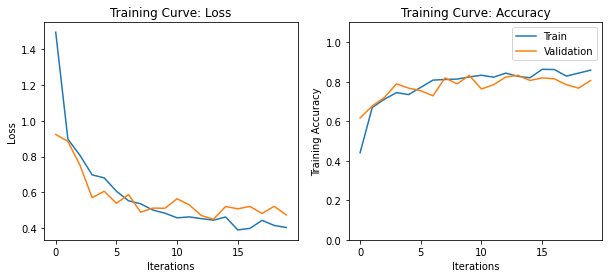

In [19]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=20, shuffle=True, num_workers=4) for x in ['train', 'val']}
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=20)

# Question 5: Report result

Train your new network, including any hyperparameter tuning. Plot and submit the training and validation loss and accuracy of your best model only. Along with it, also submit the final validation accuracy achieved by your model.

# Answer

Here we have played with the hyperparameter tuning as above, and got a model accuracy of around 0.8, which seems good enough

In [20]:
# Train and evaluate
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=30, shuffle=True, num_workers=8) for x in ['train', 'val']}
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=30)

Epoch 0/29 : train Loss: 0.4349 Acc: 0.8346	val Loss: 0.5994 Acc: 0.7241	
Epoch 1/29 : train Loss: 0.4651 Acc: 0.8228	val Loss: 0.5193 Acc: 0.8017	
Epoch 2/29 : train Loss: 0.3694 Acc: 0.8668	val Loss: 0.5264 Acc: 0.7802	
Epoch 3/29 : train Loss: 0.4954 Acc: 0.8185	val Loss: 0.6466 Acc: 0.7457	
Epoch 4/29 : train Loss: 0.5274 Acc: 0.8002	val Loss: 0.8378 Acc: 0.7241	
Epoch 5/29 : train Loss: 1.0518 Acc: 0.7444	val Loss: 0.4908 Acc: 0.7802	
Epoch 6/29 : train Loss: 0.5234 Acc: 0.8378	val Loss: 0.5407 Acc: 0.7629	
Epoch 7/29 : train Loss: 0.4388 Acc: 0.8260	val Loss: 0.5341 Acc: 0.7672	
Epoch 8/29 : train Loss: 0.4297 Acc: 0.8389	val Loss: 0.4727 Acc: 0.7974	
Epoch 9/29 : train Loss: 0.3650 Acc: 0.8604	val Loss: 0.5110 Acc: 0.7888	
Epoch 10/29 : train Loss: 0.3526 Acc: 0.8743	val Loss: 0.5165 Acc: 0.7629	
Epoch 11/29 : train Loss: 0.3794 Acc: 0.8507	val Loss: 0.4262 Acc: 0.8233	
Epoch 12/29 : train Loss: 0.7672 Acc: 0.7626	val Loss: 0.6646 Acc: 0.7414	
Epoch 13/29 : train Loss: 0.7594 Ac

We have used Alexnet for the training process, and we get decent values of train and validation accuracy. (when trained on the whole dataset)

The best loss is at epoch 29 (close to 0.3 on train and 0.4 on validation set)

The report can be found at the following link: https://iiitaphyd-my.sharepoint.com/:w:/g/personal/arathy_rose_students_iiit_ac_in/EezvMncrAaNIjEXlX0bN7-MBkYrcqpdg4tD768fmc2rnWA?e=iFJ1Oc 
